Yidan Chen
INF 2178
Assignment 4

In [84]:
#import stuff here
#ancova using pinguin
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install dfply
from dfply import *
%pip install pingouin
from pingouin import ancova
import pingouin as pg
import numpy as np
from scipy.stats import shapiro, levene

In [85]:
from google.colab import drive
# Mount file to google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
df=pd.read_csv('/content/drive/MyDrive/2178/INF2178_A4_data.csv')

In [87]:
df.head(10)

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
5,6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
6,7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
7,8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
8,10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
9,13,OAS2_0008,OAS2_0008_MR1,Nondemented,1,0,F,R,93,14,2.0,30.0,0.0,1272,0.698,1.380


In [88]:
#checking data shape
df.shape

(294, 16)

In [89]:
#checking data types
data_types = df.dtypes
data_types

Unnamed: 0      int64
Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object

In [90]:
# Ensure that 'Visit' is treated as a categorical variable for plotting
df['Visit'] = df['Visit'].astype('category')

In [91]:
# Summary statistics
df.describe()

,Unnamed: 0,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,294.000000,294.000000,294.000000,294.000000,279.000000,293.000000,294.000000,294.000000,294.000000,294.000000
mean,190.421769,349.785714,76.411565,14.561224,2.491039,27.259386,0.301020,1478.853741,0.731381,1.203109
std,106.686740,400.741520,7.607074,2.884818,1.128008,3.413454,0.381347,176.559755,0.037373,0.139365
min,0.000000,0.000000,60.000000,6.000000,1.000000,15.000000,0.000000,1106.000000,0.646000,0.876000
25%,99.000000,0.000000,71.000000,12.000000,2.000000,26.000000,0.000000,1347.250000,0.703000,1.118250
50%,195.500000,0.000000,76.000000,14.500000,2.000000,29.000000,0.000000,1461.500000,0.732000,1.201000
75%,282.750000,671.500000,81.000000,16.000000,3.000000,30.000000,0.500000,1569.000000,0.756000,1.302750
max,371.000000,1707.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [92]:
# Checking for missing values
missing_values_key_columns = df.isnull().sum()
missing_values_key_columns

Unnamed: 0     0
Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           15
MMSE           1
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [93]:
#deal with missing values in 'SES' and 'MMSE'

# Calculate the mode for the SES column
ses_mode = df['SES'].mode()[0]

# Calculate the median for the MMSE column
mmse_median = df['MMSE'].median()

# Replace missing values with the mode for SES and the median for MMSE
df['SES'].fillna(ses_mode, inplace=True)
df['MMSE'].fillna(mmse_median, inplace=True)

# Check for missing values in the dataset after the replacements
missing_values_after = df.isnull().sum()

missing_values_after


Unnamed: 0    0
Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [94]:
#Feature engineering
# Drop the 'Hand' column
df = df.drop('Hand', axis=1)

# Encode 'M/F' Gender column as numeric: 'F' as 0 and 'M' as 1
df['Gender'] = df['M/F'].map({'F': 0, 'M': 1})

In [95]:
# Check the first few rows to verify changes
df.head(10)

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Gender
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883,1
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876,1
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,75,12,2.0,23.0,0.5,1678,0.736,1.046,1
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,76,12,2.0,28.0,0.5,1738,0.713,1.010,1
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,88,18,3.0,28.0,0.0,1215,0.710,1.444,0
5,6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,90,18,3.0,27.0,0.0,1200,0.718,1.462,0
6,7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,80,12,4.0,28.0,0.0,1689,0.712,1.039,1
7,8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,83,12,4.0,29.0,0.5,1701,0.711,1.032,1
8,10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,71,16,2.0,28.0,0.5,1357,0.748,1.293,1
9,13,OAS2_0008,OAS2_0008_MR1,Nondemented,1,0,F,93,14,2.0,30.0,0.0,1272,0.698,1.380,0


#EDA

In [96]:
# Group the data by 'Group' and 'Visit' and calculate summary statistics for nWBV
summary_stats = df.groupby(['Group', 'Visit'])['nWBV'].agg(['mean', 'median', 'std','max','min'])

print(summary_stats)


                       mean  median       std    max    min
Group       Visit                                          
Converted   1      0.737786  0.7300  0.033011  0.799  0.693
            2      0.728417  0.7210  0.036140  0.788  0.677
Demented    1      0.724391  0.7260  0.031353  0.806  0.660
            2      0.713500  0.7080  0.033462  0.791  0.646
Nondemented 1      0.746125  0.7470  0.038621  0.837  0.666
            2      0.737671  0.7385  0.038549  0.827  0.663


In [99]:
# Group the data by 'Gender' and 'Visit' and calculate summary statistics for nWBV
summary_stats = df.groupby(['Gender', 'Visit'])['nWBV'].agg(['mean', 'median', 'std','max','min'])

print(summary_stats)

                  mean  median       std    max    min
Gender Visit                                          
0      1      0.743443  0.7465  0.035436  0.822  0.662
       2      0.733235  0.7380  0.036676  0.817  0.652
1      1      0.725613  0.7270  0.035584  0.837  0.660
       2      0.716780  0.7110  0.037609  0.827  0.646


In [100]:
# Group the data by 'Gender' and 'Group' and calculate summary statistics for nWBV
summary_stats = df.groupby(['Gender', 'Group'])['nWBV'].agg(['mean', 'median', 'std','max','min'])

print(summary_stats)

                        mean  median       std    max    min
Gender Group                                                
0      Converted    0.745611   0.749  0.032998  0.799  0.683
       Demented     0.721946   0.725  0.031822  0.777  0.652
       Nondemented  0.746444   0.746  0.036427  0.822  0.663
1      Converted    0.706125   0.709  0.016711  0.729  0.677
       Demented     0.716700   0.711  0.033496  0.806  0.646
       Nondemented  0.731628   0.729  0.042076  0.837  0.663


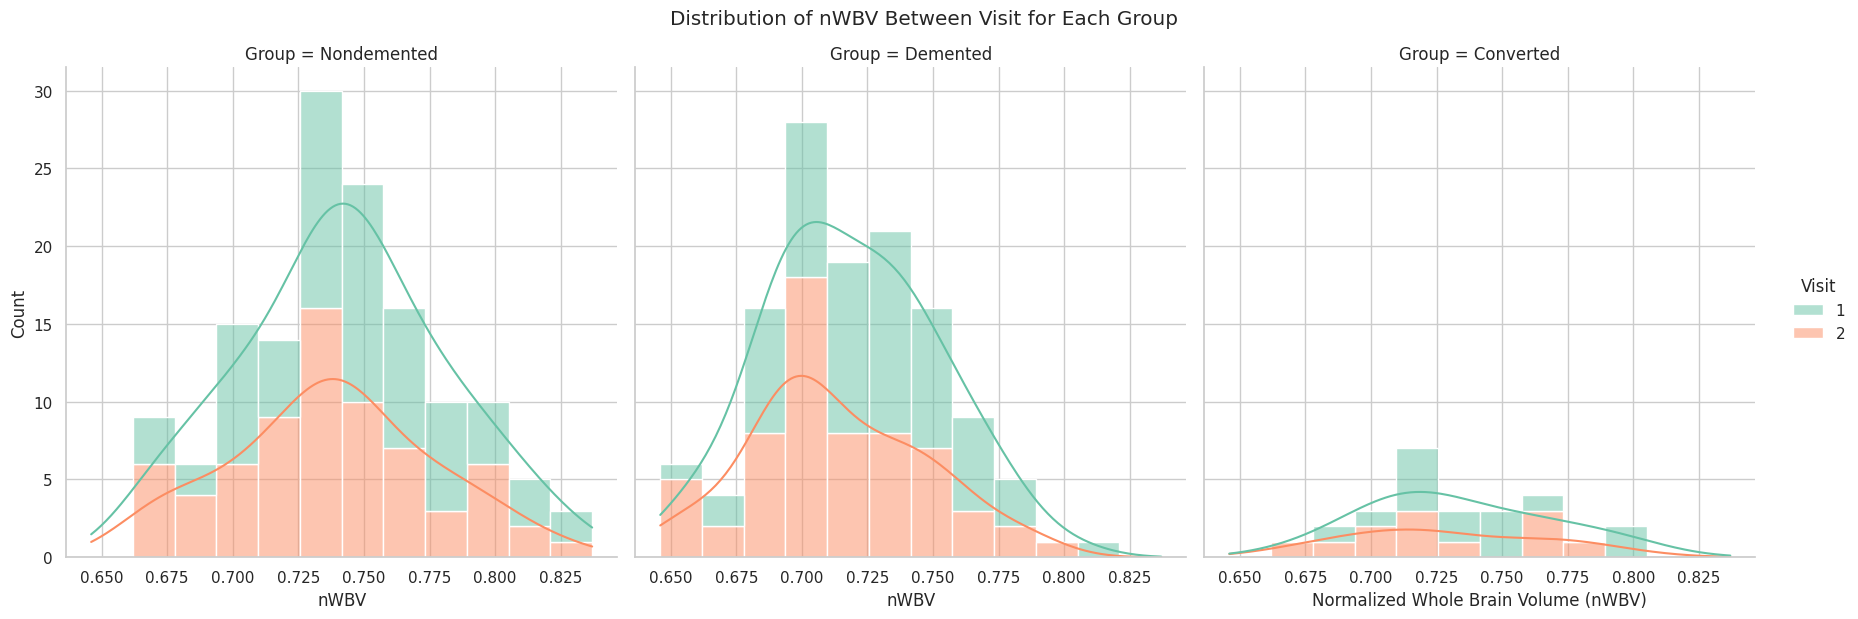

In [101]:
# To create a side-by-side histograms for each 'Visit', faceted by 'Group'.
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Using sns.displot to create a faceted histogram that allows for the 'col' parameter.
g = sns.displot(data=df, x='nWBV', hue='Visit', col='Group', kind="hist", kde=True, multiple="stack", palette="Set2", height=6, aspect=1)

g.fig.suptitle('Distribution of nWBV Between Visit for Each Group', y=1.03)
plt.xlabel('Normalized Whole Brain Volume (nWBV)')
plt.ylabel('Count')

plt.show()

<ipython-input-102-7d33402bc049>:6: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#7d0013'` for the same effect.

  ax = sns.swarmplot(x="Visit", y="nWBV", data=df, hue='Group',color='#7d0013', dodge=True)


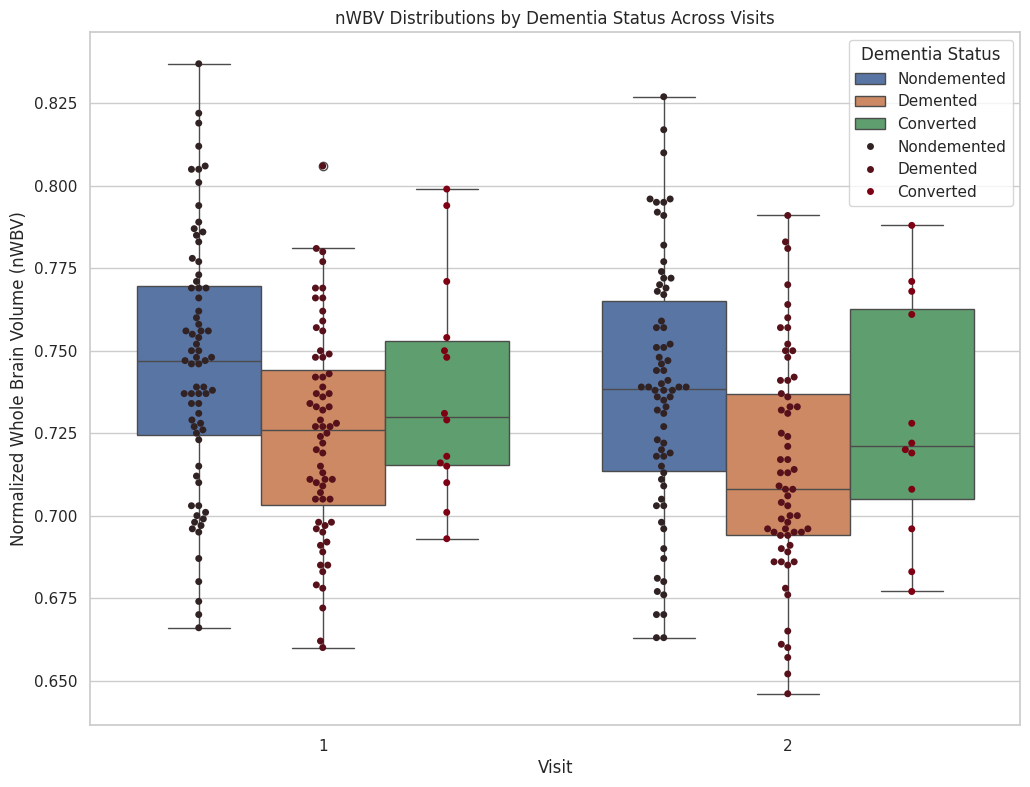

In [102]:
# Create a box plot for nWBV distributions across Groups for each visit
plt.figure(figsize=(12, 9))
ax = sns.boxplot(x='Visit', y='nWBV', data=df, hue='Group')

# Overlay with a swarm plot for detailed data distribution
ax = sns.swarmplot(x="Visit", y="nWBV", data=df, hue='Group',color='#7d0013', dodge=True)

plt.title('nWBV Distributions by Dementia Status Across Visits')
plt.xlabel('Visit')
plt.ylabel('Normalized Whole Brain Volume (nWBV)')
plt.legend(title='Dementia Status')

plt.show()


<ipython-input-103-a4f5d02a8683>:6: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#7d0013'` for the same effect.

  ax = sns.swarmplot(x="Visit", y="nWBV", data=df, hue='M/F',color='#7d0013', dodge=True)


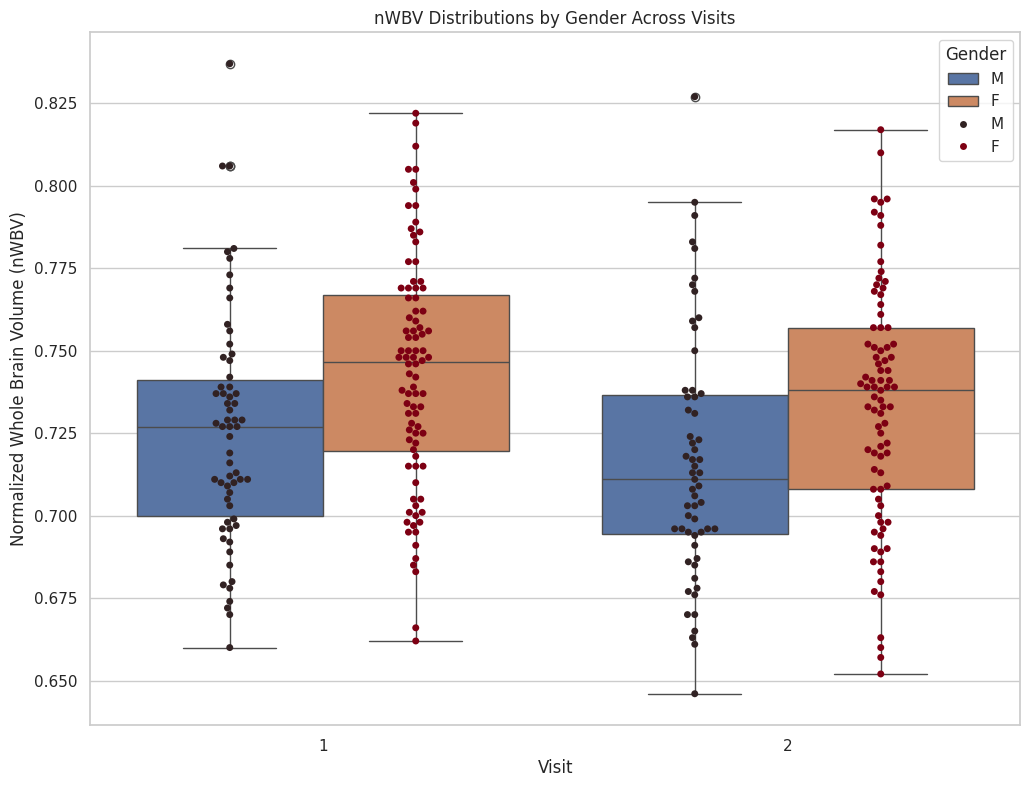

In [103]:
# Create a box plot for nWBV distributions across Groups for each gender
plt.figure(figsize=(12, 9))
ax = sns.boxplot(x='Visit', y='nWBV', data=df, hue='M/F')

# Overlay with a swarm plot for detailed data distribution
ax = sns.swarmplot(x="Visit", y="nWBV", data=df, hue='M/F',color='#7d0013', dodge=True)

plt.title('nWBV Distributions by Gender Across Visits')
plt.xlabel('Visit')
plt.ylabel('Normalized Whole Brain Volume (nWBV)')
plt.legend(title='Gender')

plt.show()

<ipython-input-104-3a66b1322a61>:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#7d0013'` for the same effect.

  ax = sns.swarmplot(x="Group", y="nWBV", data=df, hue='M/F',color='#7d0013', dodge=True)


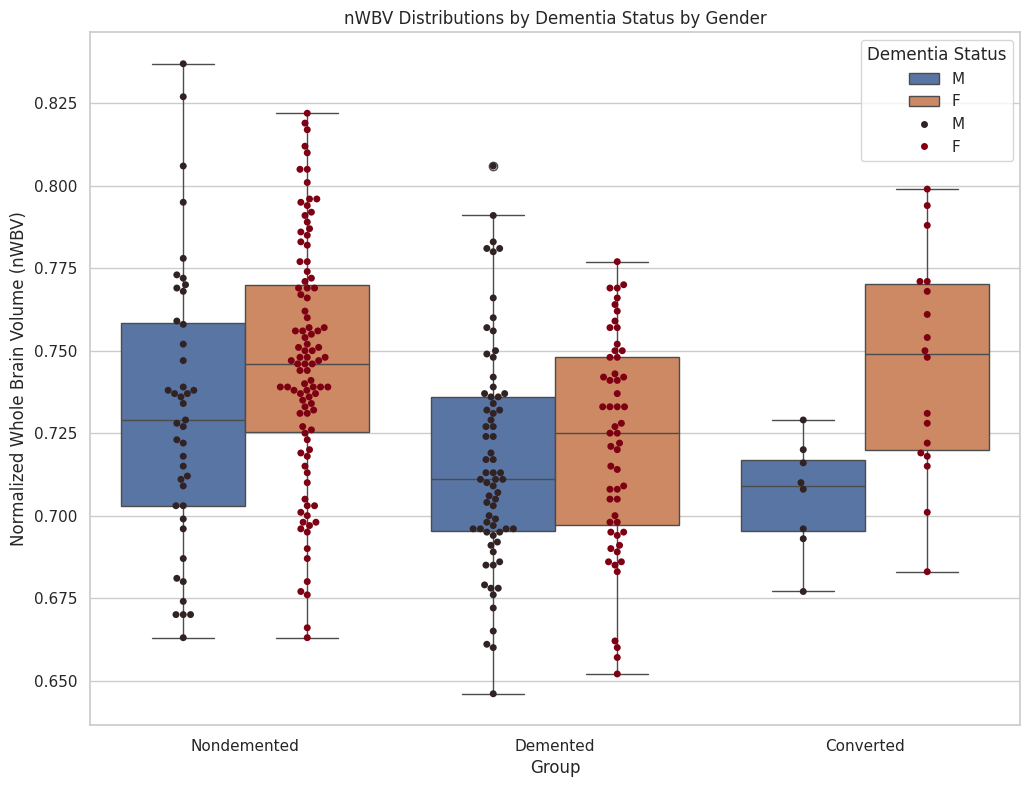

In [104]:
# Create a box plot for nWBV distributions across Groups for each gender
# Didn't mention in report due to limited pages, list here for reference
plt.figure(figsize=(12, 9))
ax = sns.boxplot(x='Group', y='nWBV', data=df, hue='M/F')

# Overlay with a swarm plot for detailed data distribution
ax = sns.swarmplot(x="Group", y="nWBV", data=df, hue='M/F',color='#7d0013', dodge=True)

plt.title('nWBV Distributions by Dementia Status by Gender')
plt.xlabel('Group')
plt.ylabel('Normalized Whole Brain Volume (nWBV)')
plt.legend(title='Dementia Status')

plt.show()


<ipython-input-105-bcf99709a516>:3: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=df, x='Group', y='nWBV', hue='M/F', dodge=True,


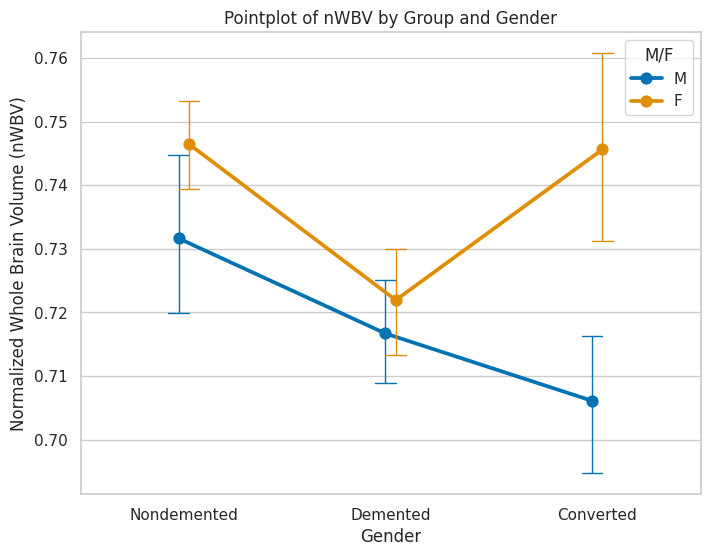

In [105]:
# Create a pointplot for nWBV by Group and Visit
plt.figure(figsize=(8, 6))
sns.pointplot(data=df, x='Group', y='nWBV', hue='M/F', dodge=True,
              capsize=.1, errwidth=1, palette='colorblind')

plt.title('Pointplot of nWBV by Group and Gender')
plt.xlabel('Gender')
plt.ylabel('Normalized Whole Brain Volume (nWBV)')

plt.show()

#ANOVA

In [106]:
# Make sure that 'Visit' is treated as a categorical variable
df['Visit'] = df['Visit'].astype('category')

# Compute the two-way mixed-design ANOVA
aov = pg.mixed_anova(dv='nWBV', within='Visit', between='Group', subject='Subject ID', data=df)

# Pretty printing of ANOVA summary
pg.print_table(aov)



ANOVA SUMMARY

Source          SS    DF1    DF2     MS       F    p-unc    np2      eps
-----------  -----  -----  -----  -----  ------  -------  -----  -------
Group        0.034      2    141  0.017   6.712    0.002  0.087  nan
Visit        0.007      1    141  0.007  94.251    0.000  0.401    1.000
Interaction  0.000      2    141  0.000   1.534    0.219  0.021  nan



In [107]:
# Post hoc tests for the 'Group' factor with pairwise t-tests and FDR-BH corrections
post_hocs_group = pg.pairwise_ttests(dv='nWBV', within='Visit', between='Group', subject='Subject ID', data=df, padjust='bonf')

# Print the results
pg.print_table(post_hocs_group)


POST HOC TESTS

Contrast       Visit    A          B            Paired    Parametric         T      dof  alternative      p-unc    p-corr  p-adjust                   BF10    hedges
-------------  -------  ---------  -----------  --------  ------------  ------  -------  -------------  -------  --------  ----------  -------------------  --------
Visit          -        1          2            True      True           9.672  143.000  two-sided        0.000   nan      nan         225800000000000.000     0.255
Group          -        Converted  Demented     False     True           1.401   14.676  two-sided        0.182     0.546  bonf                      0.668     0.469
Group          -        Converted  Nondemented  False     True          -0.648   15.832  two-sided        0.527     1.000  bonf                      0.361    -0.188
Group          -        Demented   Nondemented  False     True          -3.690  129.436  two-sided        0.000     0.001  bonf                     75.094    

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


In [108]:
# Please note because pingouin does not support multiple between-subjects factors directly in mixed_anova,
# we created an interaction term manually in the df before running the ANOVA.
# Create a new 'Group_Gender' interaction term

# Make sure 'Gender' treated as categorical variables
df['Gender'] = df['Gender'].astype('category')

df['Group_Gender'] = df['Group'] + "_" + df['Gender'].astype(str)

# Compute the mixed-design ANOVA
aov = pg.mixed_anova(dv='nWBV', within='Visit', between='Group_Gender', subject='Subject ID', data=df)

# Pretty printing of ANOVA summary
pg.print_table(aov)


ANOVA SUMMARY

Source           SS    DF1    DF2     MS       F    p-unc    np2      eps
------------  -----  -----  -----  -----  ------  -------  -----  -------
Group_Gender  0.051      5    138  0.010   4.149    0.002  0.131  nan
Visit         0.007      1    138  0.007  93.980    0.000  0.405    1.000
Interaction   0.000      5    138  0.000   1.130    0.347  0.039  nan



In [109]:
#checking new column created
df.head(10)

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Gender,Group_Gender
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883,1,Nondemented_1
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876,1,Nondemented_1
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,75,12,2.0,23.0,0.5,1678,0.736,1.046,1,Demented_1
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,76,12,2.0,28.0,0.5,1738,0.713,1.010,1,Demented_1
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,88,18,3.0,28.0,0.0,1215,0.710,1.444,0,Nondemented_0
5,6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,90,18,3.0,27.0,0.0,1200,0.718,1.462,0,Nondemented_0
6,7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,80,12,4.0,28.0,0.0,1689,0.712,1.039,1,Nondemented_1
7,8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,83,12,4.0,29.0,0.5,1701,0.711,1.032,1,Nondemented_1
8,10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,71,16,2.0,28.0,0.5,1357,0.748,1.293,1,Demented_1
9,13,OAS2_0008,OAS2_0008_MR1,Nondemented,1,0,F,93,14,2.0,30.0,0.0,1272,0.698,1.380,0,Nondemented_0


In [110]:
df.dtypes

Unnamed: 0         int64
Subject ID        object
MRI ID            object
Group             object
Visit           category
MR Delay           int64
M/F               object
Age                int64
EDUC               int64
SES              float64
MMSE             float64
CDR              float64
eTIV               int64
nWBV             float64
ASF              float64
Gender          category
Group_Gender      object
dtype: object

In [111]:
# Post hoc tests for the 'Group' factor with pairwise t-tests and FDR-BH corrections
post_hocs_group = pg.pairwise_ttests(dv='nWBV', within='Visit', between='Group_Gender', subject='Subject ID', data=df, padjust='bonf')

# Print the results
pg.print_table(post_hocs_group)

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)



POST HOC TESTS

Contrast              Visit    A              B              Paired    Parametric         T      dof  alternative      p-unc    p-corr  p-adjust                   BF10    hedges
--------------------  -------  -------------  -------------  --------  ------------  ------  -------  -------------  -------  --------  ----------  -------------------  --------
Visit                 -        1              2              True      True           9.672  143.000  two-sided        0.000   nan      nan         225800000000000.000     0.255
Group_Gender          -        Converted_0    Converted_1    False     True           2.905    9.970  two-sided        0.016     0.236  bonf                      3.768     1.313
Group_Gender          -        Converted_0    Demented_0     False     True           1.998   10.413  two-sided        0.073     1.000  bonf                      1.531     0.835
Group_Gender          -        Converted_0    Demented_1     False     True           2.402  

#statistical power analysis

In [112]:
from statsmodels.stats.power import TTestIndPower
import matplotlib.pyplot as plt
import numpy as np

# parameters for the power analysis
effect_size = 0.7  # given effect size
alpha = 0.05  # significance level
power = 0.91  # desired power

# create an instance of the power analysis class
power_analysis = TTestIndPower()

# calculate sample size for given effect size and power
sample_size = power_analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1, alternative='two-sided')
print(f'Sample size needed for each group: {sample_size:.3f}')


Sample size needed for each group: 45.451


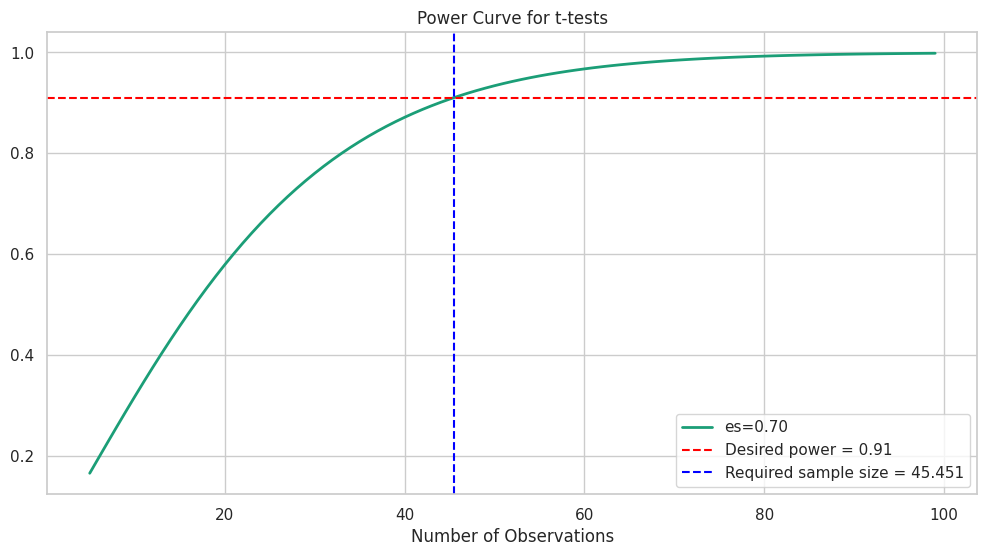

In [113]:
# Generate power curve plot
sample_sizes = np.array(range(5, 100))
effect_sizes = np.array([effect_size])  # Convert effect size to an array for plotting

fig, ax = plt.subplots(figsize=(12, 6))
power_analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes, alpha=alpha, ax=ax)
ax.set_title('Power Curve for t-tests')
ax.axhline(y=power, color='red', linestyle='--', label=f'Desired power = {power}')
ax.axvline(x=sample_size, color='blue', linestyle='--', label=f'Required sample size = {sample_size:.3f}')
ax.legend()
plt.show()